# Assignment 3

## Aerospace Computing

#### Submitted by: Dhyan Patel
#### Date : 2/3/2023

### Part 2

In [1]:
# importing all the neceassary modules
import numpy as np
import Pivoting as P
import matplotlib as m
import matplotlib.pyplot as plt
import time
import pandas as pd
from IPython.display import display
import math

In [2]:
# creating a matrix A for part 2 of the assignment
A = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        if i == j:
            A[i,j] = 4
        elif i == (j-1):
            A[i,j] = -1
        elif i == (j+1):
            A[i,j] = -1
B = np.zeros((20,1))
B[19,0] = 100

In [3]:
# creating copies for the matrices A and B to be used for the direct methods

A1 = A.copy()
A2 = A.copy()
A3 = A.copy()

B1 = B.copy()
B2 = B.copy()
B3 = B.copy()

In [4]:
#cramer

t1 = time.perf_counter()
x1 = P.cramer(A1,B1)
t2 = time.perf_counter()
T1 = t2-t1
acc1 = P.accuracy(A,B,x1)

In [5]:
#gaussPivot

t1 = time.perf_counter()
x2 = P.gaussPivot(A2,B2)
t2 = time.perf_counter()
T2 = t2-t1
acc2 = P.accuracy(A,B,x2)

In [6]:
#Ludecomp

t1 = time.perf_counter()
Ap,seq = P.LUdecomp(A3)
x3 = P.LUsolve(Ap,B3,seq)
t2 = time.perf_counter()
T3 = t2-t1
acc3 = P.accuracy(A,B,x3)

In [7]:
# making functions for the iterative methods

# function Av return the multiplication of vectorr A and v
def Ax(v):
    n = len(v)
    Ax = np.zeros(n)
    Ax[0] = 4.0*v[0] - v[1]
    Ax[1:n-1] = -v[0:n-2] + 4.0*v[1:n-1] -v [2:n]
    Ax[n-1] = -v[n-2] + 4.0*v[n-1]
    return Ax

# iterEqs returns the improved x by performing the give equation on it
def iterEqs(x,omega):
    n = len(x)
    x[0] =(omega/4.0)*(x[1]) + (1.0 - omega)*x[0]
    for i in range(1,n-1):
        x[i] = (omega/4.0)*(x[i-1] + x[i+1]) + (1.0 - omega)*x[i]
    x[n-1] = (omega/4.0)*(100.0 + x[n-2]) + (1.0 - omega)*x[n-1]
    return x

In [8]:
# making a b vector for the iterative methods 

b = np.zeros(20)
b[19] = 100

In [9]:
#guassSeidel

# gaussSeidel if the first iterative method that calculates based on improving the guess made for x
x_1 = np.ones(20)
t1 = time.perf_counter()
x4,i,omega = P.gaussSeidel(iterEqs,x_1)
t2 = time.perf_counter()
print(x4)
T4 = t2-t1
acc4 = np.linalg.norm(b-Ax(x4))
print(acc4)

[2.19125696e-10 1.21687558e-09 4.97260251e-09 1.88710210e-08
 7.05901964e-08 2.63502959e-07 9.83412559e-07 3.67013658e-06
 1.36971270e-05 5.11183684e-05 1.90776346e-04 7.11987013e-04
 2.65717171e-03 9.91669982e-03 3.70096276e-02 1.38121810e-01
 5.15477614e-01 1.92378865e+00 7.17967697e+00 2.67949192e+01]
5.163348942381056e-10


In [10]:
# conjugate gradient

# conjGrad is the second iterative methods that work by making better guesses for x with every iteration
x_2 = np.ones(20)
t1 = time.perf_counter()
x5, i = P.conjGrad(Ax,x_2,b)
t2 = time.perf_counter()
T5 = t2-t1
acc5 = np.linalg.norm(b-Ax(x5))

In [11]:
# organizing the collect data for plotting purposes

data = {'Method': ['Cramer','gaussPivot','LUPivot','gaussSeidel','conjGrad'],
       'Accuracy': [acc1,acc2,acc3,acc4,acc5],
       'Timing': [T1,T2,T3,T4,T5],
       }

df = pd.DataFrame(data, index = [1,2,3,4,5])
display(df)

,Method,Accuracy,Timing
1,Cramer,3.653815e-13,0.005149
2,gaussPivot,1.118868e-15,0.002347
3,LUPivot,1.118868e-15,0.006567
4,gaussSeidel,5.163349e-10,0.002006
5,conjGrad,3.978579e-15,0.003638


##### as you can see here the timing values of gaussPivot and gaussSiedel are relatively less than the others, with gaussSiedel being the fastest, while saying that gaussSiedel has the worst accuracy as well, which probably can be improved by increasing the tolerance levels of the function

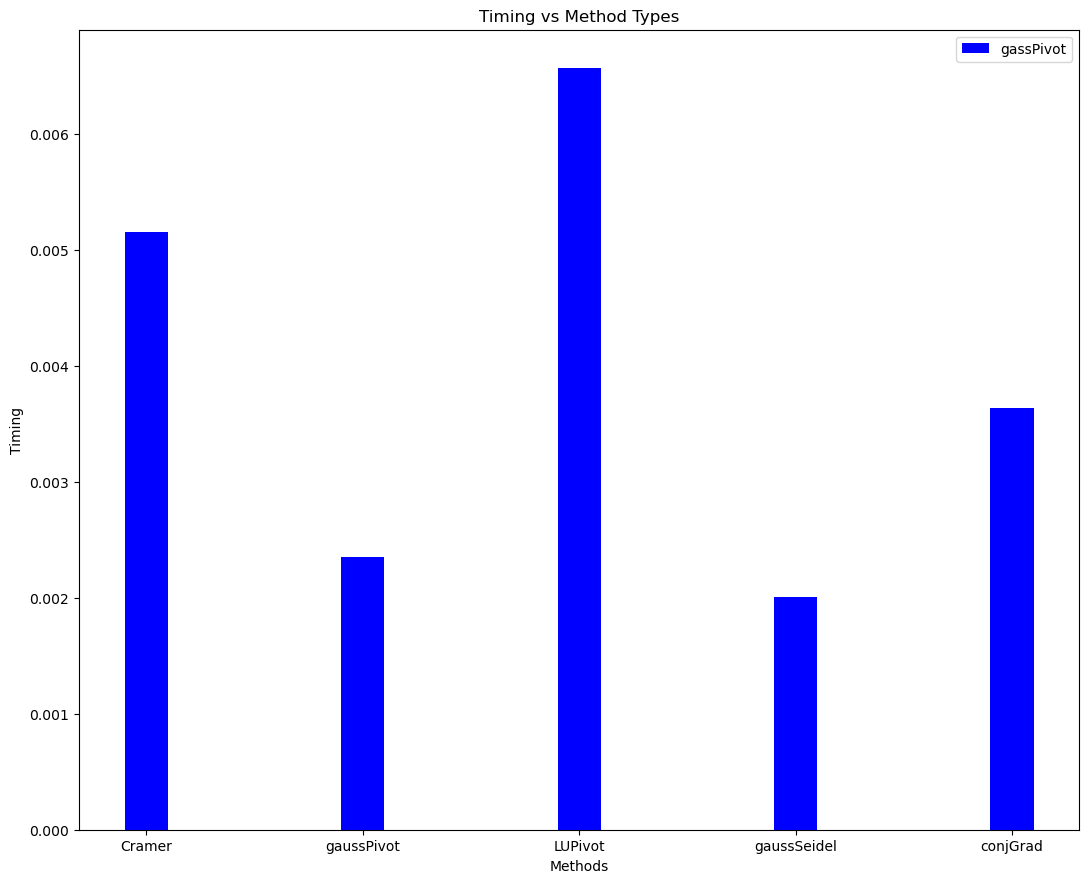

In [12]:
# plotting comparision of timiings

fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0,0,1,1])

X = np.arange(len(data.get('Method')))

# plotting a bar graph
ax.bar(X, data.get('Timing'), color = 'b', align = 'center', width = 0.2, label = 'gassPivot')
# adding the necessary identifiers
ax.legend()
ax.set_xticks(X,data.get('Method'))
ax.set_ylabel('Timing')
ax.set_xlabel('Methods')
ax.set_title('Timing vs Method Types')
# showing the graph
plt.show()

#### again we can see here that gaussSiedel was the fastest

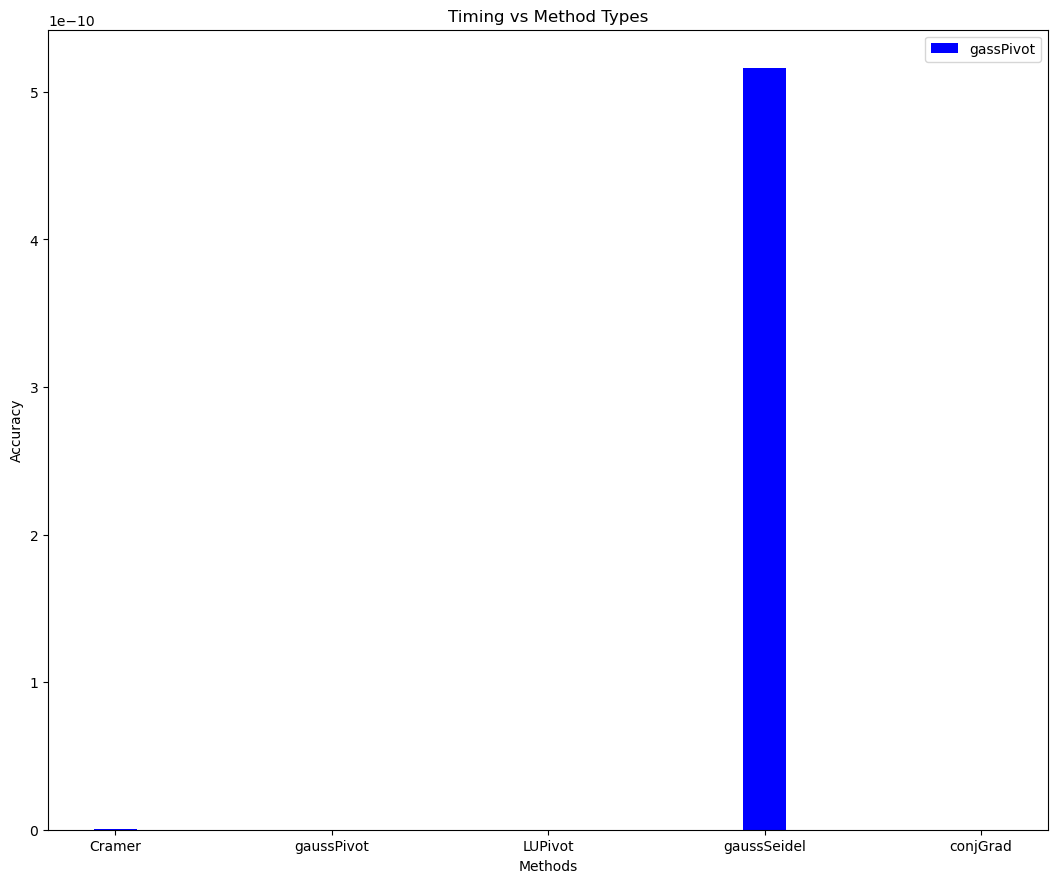

In [13]:
# plotting comparision of accuracy

fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0,0,1,1])

X = np.arange(len(data.get('Method')))

# plotting a bar graph
ax.bar(X, data.get('Accuracy'), color = 'b', align = 'center', width = 0.2, label = 'gassPivot')
# adding the necessary identifiers
ax.legend()
ax.set_xticks(X,data.get('Method'))
ax.set_ylabel('Accuracy')
ax.set_xlabel('Methods')
ax.set_title('Timing vs Method Types')
# showing the graph
plt.show()

##### we can see here that gaussSieled had the worst accuracy out of all the methods

### Part 3

In [14]:
# making a function for the part 3 to be solved with conjGrad function

def Av(x):
    
    l_b=[]
    n = len(x)
    A = np.zeros(n)
    m = int(math.sqrt(n))
    
    # Top Left Corner
    A[0] = -4.0*x[0]+x[1]+x[m]
    
    # Top Right Corner
    A[m-1] = x[m-2]-4.0*x[m-1]+x[2*m-1]
    
    # Bottom Left Corner
    A[(m**2)-m] = -4.0*x[(m**2)-m]+x[(m**2)-m+1]+x[(m**2)-2*m]
    
    # Bottom Right Corner
    A[(m**2)-1] = x[(m**2)-2]-4.0*x[(m**2)-1]+x[(m**2)-1-m]
    
    # Top Layer from 1 to m-2
    for i in range(1,m-1):
        A[i] = x[i-1]-4.0*x[i]+x[i+1]+x[i+m]
    
    # Bottom Layer from m^2-m to m^2-2
    for i in range((m**2)-m,(m**2)-1):
        A[i] = x[i-1]-4.0*x[i]+x[i+1]+x[i-m]
        
    # For the Layer in between from 1 to m-2
    for i in range(1,m-1):
        for j in range((i*m)+1,(i*m)+(m-1)):
            A[j] = x[j-1]-4.0*x[j]+x[j+1]+x[j-m]+x[j+m]
    
    # For the Ones at the left wall
        A[i*m] = -4.0*x[i*m]+x[(i*m)+1]+x[(i*m)-m]+x[(i*m)-m]
    
    # For tht ones at the Right wall
        A[(i*m)+(m-1)] = x[(i*m)+(m-1)-1]-4.0*x[(i*m)+(m-1)]+x[(i*m)+(m-1)-m]+x[(i*m)+(m-1)+m]
    return A

In [15]:
# making empty lists to store performace values

time_values = []
accu = []

In [16]:
# Making B for the part 3 of the assignment

b = np.zeros(81)
v = int(math.sqrt(len(b)))
b[v-1:v**2-1:v] = -100.
b[v**2-v:v**2-1] = -200.
b[v**2-1] = -300.

# creating a x

x = np.ones(81)

# starting the time counter
t1 = time.perf_counter()
x6,i = P.conjGrad(Av,x,b)
t2 = time.perf_counter()

# storing the counted values
time_values.append(t2-t1)
accu.append(np.linalg.norm(b-Av(x6)))

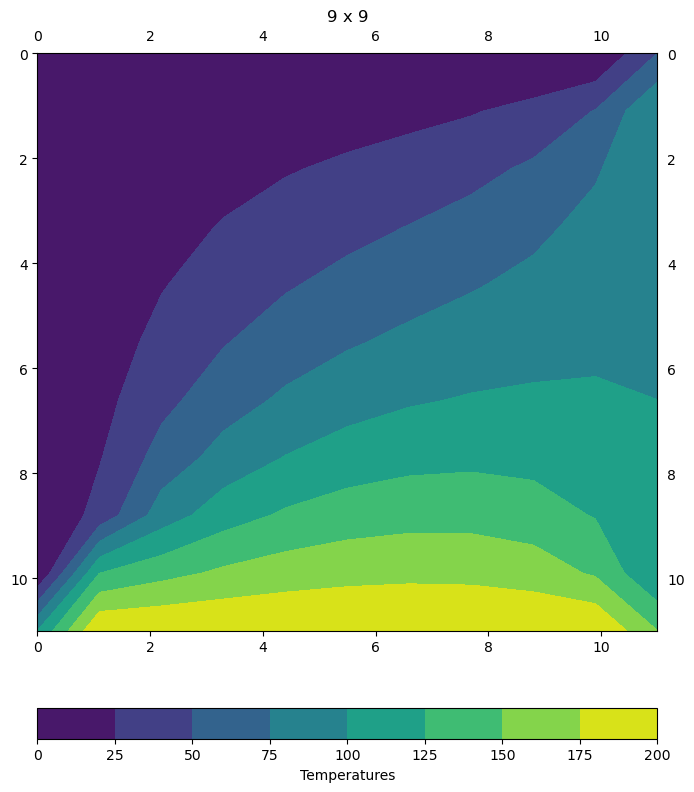

In [17]:
# creating a supporting array
n1 = np.linspace(0,11,11, dtype = float)
n2 = np.linspace(0,11,11, dtype = float)
N1, N2 = np.meshgrid(n1,n2)

# adjusting the array
T = x6.reshape(9,9)
T = np.pad(T, (1,1), 'constant', constant_values=(0))
T[:,10] = 100
T[0,10] = 50
T[10:] = 200
T[10,0] = 100
T[10,10] = 150

# plotting
fig3, ax = plt.subplots(figsize = (8,10))
cont = ax. contourf(N1, N2, T, vmin = 0, vmax = 200)
cbar = fig3.colorbar(cont, orientation = 'horizontal', pad = 0.1)
cbar.set_label('Temperatures')
ax.set_title('%0.d x %1.d' %(9 , 9))
ax.invert_yaxis()
ax.tick_params(labeltop = True, labelright = True)
plt.show()

In [18]:
# making more temperature maps for pereformace analysis

# giviing a first temperature map size
n = 40

# using a for loop to plot the graphs
for k in range(0,3):
    n = n + k*n
    
    # creating b
    b = np.zeros(n**2)
    v = int(math.sqrt(len(b)))
    b[v-1:v**2-1:v] = -100.
    b[v**2-v:v**2-1] = -200.
    b[v**2-1] = -300.
    
    # creating x
    x = np.ones(n**2)
    
    # starting the counter
    t1 = time.perf_counter()
    x6,i = P.conjGrad(Av,x,b)
    t2 = time.perf_counter()
    
    # storing the values
    time_values.append(t2-t1)
    accu.append(np.linalg.norm(b-Av(x6)))
    
    # creating a supporting array
    n1 = np.linspace(0,v+2,v+2, dtype = float)
    n2 = np.linspace(0,v+2,v+2, dtype = float)
    N1, N2 = np.meshgrid(n1,n2)
    
    # adjusting the arrays
    T = x6.reshape(v,v)
    T = np.pad(T, (1,1), 'constant', constant_values=(0))
    T[:,v+1] = 100
    T[0,v+1] = 50
    T[v+1:] = 200
    T[v+1,0] = 100
    T[v+1,v+1] = 150
    
    # plotting
    fig3, ax = plt.subplots(figsize = (8,10))
    cont = ax. contourf(N1, N2, T, vmin = 0, vmax = 200)
    cbar = fig3.colorbar(cont, orientation = 'horizontal', pad = 0.1)
    cbar.set_label('Temperatures')
    ax.set_title('%0.d x %1.d' %(n,n))
    ax.invert_yaxis()
    ax.tick_params(labeltop = True, labelright = True)
    plt.show()
    n = 40


KeyboardInterrupt: 

#### As you can see on all the 3 graphs here that were done that the graphs get relatively smootherr as the matrices become larger, and also the computing time of the machine is also visible, as the 120 x 120 matrix took about 8 minutes to generate. Which is a very visible time difference apart from the other matrices that we did earlier 

In [ ]:
# creating an empty list for saving the order of operations
o3 = []

# using a for loop to process the order of operations

for i in range(1,len(time_values)):
    o3.append(time_values[i]/time_values[i-1])
print('The order of operation found was:', sum(o3)/len(o3))
o3.insert(0, '--')

# printing a table for the performace comparison
data = {'Matrix': ['9x9','40x40','80x80','120x120'],
       'Accuracy': accu,
       'Timing': time_values,
       'Order of operations': o3,
       }

df = pd.DataFrame(data, index = [1,2,3,4])
display(df)

#### It is quite evident here that the order of operation as gotten above is about 99.7492 or 100 after rounding. Also the time taken by the bigger matrices increasing exponetially, that is also something that suggests the order of operation is a function of power / exponents

In [ ]:
fig, ax = plt.subplots()
ax.plot(data.get('Matrix'), data.get('Timing'), 'b', label = 'Order of operations')
ax.set_xlabel('Matrix Type')
ax.set_ylabel('Timing')
ax.set_title('Timing')
plt.show()

#### Again after plotting the function here we can see that the graph resembles very much an exponential function. So getting a value of 100 seems accurate for the order of operations